# Baseline CNN and creation of BSD

### This file has the results of the baseline CNN and the creation of BSD dataset. The steps performed are:

1. This dataset consists of 2302 training and 998 test samples. 
2. The experimental dataset is randomly split into train and test sets with a split ratio of 70:30.
3. The baseline CNN model has four convolutional layers with 15 filters each of size 3*3. 
4. Adam's technique is used as the optimizer. Binary cross-entropy is used as the loss function. 
5. This CNN is trained for 150 epochs. 
6. Softmax is used as the final activation function which outputs predicted probabilities. 
7. The BSD is created which contains all the samples whose confidence factor is less than a certain threshold

In [1]:
import scipy.misc
import random
import imageio
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib
from keras.applications.inception_v3 import InceptionV3

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras.utils.vis_utils import plot_model
from keras import backend as K
import keras.optimizers as optimizers
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.models import load_model
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation, BatchNormalization
from keras.optimizers import SGD,RMSprop,Adam

The malignant and benign data is loaded to np arrays. 

In [2]:
xs = []
ys = []
def Load_data_malignant():
    path ="Dataset_Final/malignant"
    x_out = []
    y_out = []
    for i in range(1, 1500):
        img = imageio.imread(path +'/' + str(i) + '.jpg')
        lab = 1 
        x_out.append(img)
        y_out.append(lab)
    return x_out, y_out


In [3]:
def Load_data_benign():
    path ="Dataset_Final/benign"
    x_out = []
    y_out = []
    for i in range(1, 1800):
        img = imageio.imread(path +'/' + str(i) + '.jpg')
        lab = 0 
        x_out.append(img)
        y_out.append(lab)
    return x_out, y_out

The benign and malignant arrays are assigned to x and y arrays

In [4]:
x_0, y_0 = Load_data_benign()

In [5]:
x_1, y_1 = Load_data_malignant()

In [6]:
x_0 = np.array(x_0)
y_0 = np.array(y_0)

x_1 = np.array(x_1)
y_1 = np.array(y_1)


The arrays are concatenated to form x and y arrays (features, outputs)

In [7]:
num_classes = 2
x=np.concatenate((x_0, x_1), axis=0)
y=np.concatenate((y_0, y_1), axis=0)

y = np_utils.to_categorical(y, num_classes)

The data is split as train and test with 70:30 split

In [8]:
x_train, x_Test, y_train, y_Test = train_test_split(x, y, test_size=0.3, random_state=5,stratify=y)

The CNN model is defined below

In [9]:
nClasses = 2

def createModel():
    model = Sequential()
    
    model.add(Conv2D(15, (3, 3), padding='valid', activation='relu', input_shape=(224,224,3)))
    model.add(BatchNormalization())
      
    model.add(Conv2D(15, (3, 3), padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
 
    model.add(Conv2D(15, (3, 3), padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(15, (3, 3), padding='valid', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(nClasses, activation='softmax'))
    model.summary()
     
    return model

Optimizer is chosen as Adam, binary cross entropy is the loss function, with epochs as 150

In [10]:
model1 = None
model1 = createModel()
batch_size = 40
epochs = 150
opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.99, epsilon=None, decay=0)
model1.compile(loss='binary_crossentropy', optimizer=opt,metrics = ['categorical_accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 15)      420       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 15)     60        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 15)      2040      
                                                                 
 batch_normalization_1 (Batc  (None, 222, 222, 15)     60        
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 15)     0         
 )                                                               
                                                        

C:\Users\spoor\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


The model is fit to the data

In [11]:
history=model1.fit(x_train, y_train, epochs=150,batch_size = batch_size,validation_data= (x_Test, y_Test), shuffle=True)

Epoch 1/150
58/58 [==============================] - 112s 2s/step - loss: 0.7045 - categorical_accuracy: 0.7704 - val_loss: 0.5355 - val_categorical_accuracy: 0.7313
Epoch 2/150
58/58 [==============================] - 108s 2s/step - loss: 0.4040 - categorical_accuracy: 0.8072 - val_loss: 0.9080 - val_categorical_accuracy: 0.7010
Epoch 3/150
58/58 [==============================] - 105s 2s/step - loss: 0.3727 - categorical_accuracy: 0.8224 - val_loss: 0.7965 - val_categorical_accuracy: 0.7414
Epoch 4/150
58/58 [==============================] - 105s 2s/step - loss: 0.3585 - categorical_accuracy: 0.8284 - val_loss: 0.7691 - val_categorical_accuracy: 0.7404
Epoch 5/150
58/58 [==============================] - 105s 2s/step - loss: 0.3609 - categorical_accuracy: 0.8150 - val_loss: 0.6084 - val_categorical_accuracy: 0.7808
Epoch 6/150
58/58 [==============================] - 105s 2s/step - loss: 0.3446 - categorical_accuracy: 0.8267 - val_loss: 0.7854 - val_categorical_accuracy: 0.7162
Epoc

58/58 [==============================] - 95s 2s/step - loss: 0.0436 - categorical_accuracy: 0.9900 - val_loss: 4.7591 - val_categorical_accuracy: 0.7111
Epoch 100/150
58/58 [==============================] - 95s 2s/step - loss: 0.0204 - categorical_accuracy: 0.9931 - val_loss: 1.5635 - val_categorical_accuracy: 0.8071
Epoch 101/150
58/58 [==============================] - 99s 2s/step - loss: 0.0183 - categorical_accuracy: 0.9957 - val_loss: 1.0247 - val_categorical_accuracy: 0.8293
Epoch 102/150
58/58 [==============================] - 95s 2s/step - loss: 0.0282 - categorical_accuracy: 0.9922 - val_loss: 1.4206 - val_categorical_accuracy: 0.8172
Epoch 103/150
58/58 [==============================] - 98s 2s/step - loss: 0.0187 - categorical_accuracy: 0.9926 - val_loss: 3.0971 - val_categorical_accuracy: 0.7667
Epoch 104/150
58/58 [==============================] - 100s 2s/step - loss: 0.0176 - categorical_accuracy: 0.9961 - val_loss: 1.6808 - val_categorical_accuracy: 0.7677
Epoch 105/1

58/58 [==============================] - 104s 2s/step - loss: 0.0062 - categorical_accuracy: 0.9974 - val_loss: 2.3110 - val_categorical_accuracy: 0.8374
Epoch 149/150
58/58 [==============================] - 100s 2s/step - loss: 0.0131 - categorical_accuracy: 0.9965 - val_loss: 8.3449 - val_categorical_accuracy: 0.7253
Epoch 150/150
58/58 [==============================] - 102s 2s/step - loss: 0.0187 - categorical_accuracy: 0.9944 - val_loss: 1.4980 - val_categorical_accuracy: 0.8020


The accuracy and loss graphs are obtained

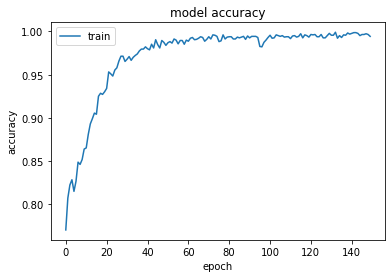

In [12]:
plt.plot(history.history['categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

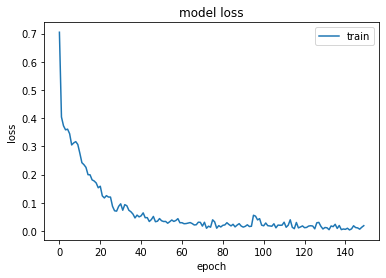

In [13]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

The classification report of the test data is printed

In [15]:
from sklearn.metrics import classification_report
pred = model1.predict(x_Test, batch_size=32, verbose=1)
predicted = np.argmax(pred, axis=1)
report = classification_report(np.argmax(y_Test, axis=1), predicted)
print(report)

31/31 [==============================] - 6s 191ms/step
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       540
           1       0.82      0.73      0.77       450

    accuracy                           0.80       990
   macro avg       0.80      0.80      0.80       990
weighted avg       0.80      0.80      0.80       990



After observing the CPVS of the test samples and the respective outputs, the threshold is calculated as 99.99995 and the BSD is created

In [16]:
from PIL import Image
import numpy as np
import os 
for i in range(989):
    if abs((pred[i][0]*100) - (pred[i][1]*100)) < 99.99995 :
        img = Image.fromarray(x_Test[i], 'RGB')
        if np.argmax(y_Test[i])== 0:
                img.save(os.path.join('final/benign/',str(i)+'.jpg'))
        if np.argmax(y_Test[i])== 1:
                img.save(os.path.join('final/malignant/', str(i)+'.jpg'))

In [ ]:
# import os
# from sklearn.model_selection import train_test_split
# import shutil

# # Set paths to the folders containing the images
# malignant_folder = "C:/Users/spoor/finalproject/melanoma-detection/final/malignant"
# benign_folder = "C:/Users/spoor/finalproject/melanoma-detection/final/benign"

# # Set the paths for the train and test folders
# train_folder = "C:/Users/spoor/finalproject/melanoma-detection/final/train"
# test_folder = "C:/Users/spoor/finalproject/melanoma-detection/final/test"

# # Set the percentage of images to be used for testing
# test_size = 0.3

# # Get the list of filenames in each folder
# malignant_files = os.listdir(malignant_folder)
# benign_files = os.listdir(benign_folder)

# # Split the filenames into train and test sets
# malignant_train, malignant_test = train_test_split(malignant_files, test_size=test_size)
# benign_train, benign_test = train_test_split(benign_files, test_size=test_size)

# # Create the train and test folders and subfolders
# os.makedirs(train_folder + '/malignant', exist_ok=True)
# os.makedirs(train_folder + '/benign', exist_ok=True)
# os.makedirs(test_folder + '/malignant', exist_ok=True)
# os.makedirs(test_folder + '/benign', exist_ok=True)

# # Copy the train and test images to the respective folders
# for filename in malignant_train:
#     shutil.copy(malignant_folder + '/' + filename, train_folder + '/malignant')
# for filename in malignant_test:
#     shutil.copy(malignant_folder + '/' + filename, test_folder + '/malignant')
# for filename in benign_train:
#     shutil.copy(benign_folder + '/' + filename, train_folder + '/benign')
# for filename in benign_test:
#     shutil.copy(benign_folder + '/' + filename, test_folder + '/benign')


In [5]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set paths to the folders containing the images
benign_folder = 'C:/Users/spoor/finalproject/melanoma-detection/final/benign'
malignant_folder = 'C:/Users/spoor/finalproject/melanoma-detection/final/malignant'
test_folder = 'C:/Users/spoor/finalproject/melanoma-detection/final/test'

# Get the list of filenames in the benign and malignant folders
benign_files = os.listdir(benign_folder)
malignant_files = os.listdir(malignant_folder)

# Split the filenames into training and test sets using scikit-learn
benign_train, benign_test = train_test_split(benign_files, test_size=0.3)
malignant_train, malignant_test = train_test_split(malignant_files, test_size=0.3)


# Move the test images to the test folder
for filename in benign_test:
    source_path = benign_folder + '/' + filename
    dest_path = test_folder + '/' + filename
    if os.path.exists(dest_path):
        # If file already exists in the destination folder, add a suffix to the filename
        root, ext = os.path.splitext(filename)
        new_filename = root + '_copy' + ext
        dest_path = test_folder + '/' + new_filename
    shutil.move(source_path, dest_path)
    
for filename in malignant_test:
    source_path = malignant_folder + '/' + filename
    dest_path = test_folder + '/' + filename
    if os.path.exists(dest_path):
        # If file already exists in the destination folder, add a suffix to the filename
        root, ext = os.path.splitext(filename)
        new_filename = root + '_copy' + ext
        dest_path = test_folder + '/' + new_filename
    shutil.move(source_path, dest_path)


In [9]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained CNN model
model = load_model('keras_model_conv2D_v2.h5')

# Set paths to the folders containing the images
test_folder = 'C:/Users/spoor/finalproject/melanoma-detection/final/test'

# Get the list of filenames in the test folder
test_files = os.listdir(test_folder)

# Define a function to extract features from an image using the trained model
def extract_features(filename):
    img = image.load_img(test_folder + '/' + filename, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    #x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

# Extract features from each image in the test folder
features_list = []
for filename in test_files:
    features = extract_features(filename)
    features_list.append(features)

# Convert the feature list to a Pandas DataFrame and save to an Excel file
df = pd.DataFrame(features_list)
df.to_excel('cnn.xlsx', index=False)


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 79ms/step
